## From Scratch Learning with Unsegmented Images

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model 
import matplotlib.pyplot as plt
import tensorflow as tf
from glob import glob
import numpy as np
import itertools 

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '../data/train'
val_path = '../data/val'

In [ ]:
num_classes = 4
input_shape = (224,224,3)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (3, 224, 224)
    chanDim = 1

my_model= Sequential()
my_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
my_model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
my_model.add(MaxPool2D(pool_size = (2, 2)))

my_model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
my_model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
my_model.add(MaxPool2D(pool_size=(2, 2)))

my_model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
my_model.add(Conv2D(32, (3, 3), activation='relu',padding = 'Same'))
my_model.add(MaxPool2D(pool_size=(2, 2)))
my_model.add(Dropout(0.25))

my_model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
my_model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
my_model.add(MaxPool2D(pool_size=(2, 2)))
my_model.add(Dropout(0.25))

my_model.add(Flatten())
my_model.add(Dense(1024, activation='relu'))
my_model.add(Dense(1024, activation='relu'))
my_model.add(Dropout(0.4))

my_model.add(Dense(num_classes, activation='softmax'))
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        3

In [ ]:
from keras.optimizers import Adam

opt = Adam(lr=0.0001,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0,  amsgrad=False)

In [ ]:
# tell the model what cost and optimization method to use

my_model.compile(
  loss='categorical_crossentropy',
  optimizer = opt,
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                             rotation_range=10,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             shear_range = 0.2, 
                             vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6024 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle = False,
                                            class_mode = 'categorical')

Found 1506 images belonging to 4 classes.


In [ ]:
# ReduceLROnPlateau - automatically set the LR if no change is detected

from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', 
                                             patience = 3, 
                                             verbose = 1, 
                                             factor = 0.5, 
                                             min_lr = 0.00001)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
model_history = my_model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  callbacks = [learning_rate_reduction],
  steps_per_epoch = len(training_set),
  validation_steps = len(test_set)  
)

Epoch 1/50
189/189 [==============================] - 2281s 12s/step - loss: 1.3207 - accuracy: 0.3407 - val_loss: 1.0229 - val_accuracy: 0.5870
Epoch 2/50
189/189 [==============================] - 83s 441ms/step - loss: 1.0179 - accuracy: 0.5675 - val_loss: 0.8631 - val_accuracy: 0.6355
Epoch 3/50
189/189 [==============================] - 79s 418ms/step - loss: 0.8470 - accuracy: 0.6409 - val_loss: 0.7079 - val_accuracy: 0.7218
Epoch 4/50
189/189 [==============================] - 80s 423ms/step - loss: 0.7618 - accuracy: 0.6808 - val_loss: 0.7142 - val_accuracy: 0.7052
Epoch 5/50
189/189 [==============================] - 82s 434ms/step - loss: 0.7092 - accuracy: 0.7135 - val_loss: 0.6228 - val_accuracy: 0.7390
Epoch 6/50
189/189 [==============================] - 79s 419ms/step - loss: 0.6500 - accuracy: 0.7419 - val_loss: 0.6247 - val_accuracy: 0.7424
Epoch 7/50
189/189 [==============================] - 79s 417ms/step - loss: 0.5896 - accuracy: 0.7700 - val_loss: 0.5511 - val_ac

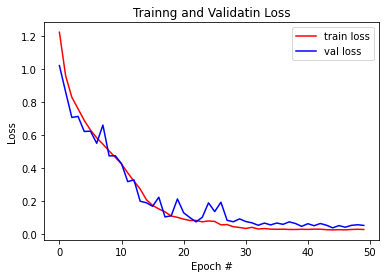

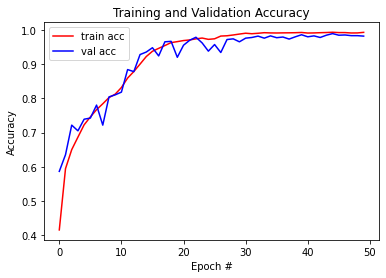

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(model_history.history['loss'],'r', label='train loss')
plt.plot(model_history.history['val_loss'],'b', label='val loss')
plt.title("Trainng and Validatin Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_history.history['accuracy'],'r', label='train acc')
plt.plot(model_history.history['val_accuracy'],'b', label='val acc')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
loss, accuracy = my_model.evaluate(test_set, verbose=1)
t_loss, t_accuracy = my_model.evaluate(training_set, verbose=1)

189/189 [==============================] - 71s 378ms/step - loss: 0.0189 - accuracy: 0.9934


In [ ]:
print("Training: accuracy = %f  ;  Training loss = %f" % (t_accuracy, t_loss))
print("Validation: accuracy = %f  ;  Validation loss = %f" % (accuracy, loss))

Training: accuracy = 0.993360  ;  Training loss = 0.018924
Validation: accuracy = 0.981408  ;  Validation loss = 0.052188


In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

my_model = tf.keras.models.load_model('../models/faba_bean_model_4mScratch_2__best.h5')

In [ ]:
# open saved model file
import tensorflow as tf
from tensorflow.keras.models import load_model
my_model = tf.keras.models.load_model('../models/faba_bean_model_4mScratch_2__best.h5')

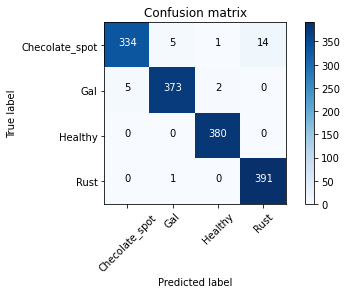

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Get the predicted classes
predictions = my_model.predict(test_set,  1506 // 32 + 1)
predicted_classes = np.argmax(predictions, axis = 1) 

# Get ground-truth classes and class-labels
true_classes = test_set.classes

target_name = ['Chocolate_spot', 'Gal', 'Healthy', 'Rust']

confusion_mtx = confusion_matrix(true_classes, predicted_classes)

plot_confusion_matrix(confusion_mtx, classes = target_name) 

Text(0, 0.5, 'Fraction classified incorrectly')

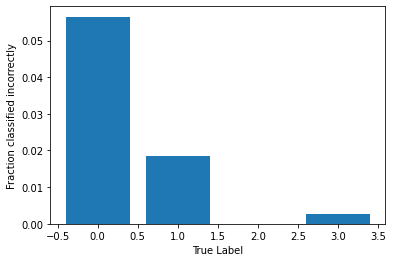

In [ ]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(4),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

In [ ]:
print('\nClassification Report\n')
class_labels = ['Chocolate_spot', 'gal', 'healthy', 'rust']
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Classification Report

                precision    recall  f1-score   support

Checolate_spot       0.99      0.94      0.96       354
           gal       0.98      0.98      0.98       380
       healthy       0.99      1.00      1.00       380
          rust       0.97      1.00      0.98       392

      accuracy                           0.98      1506
     macro avg       0.98      0.98      0.98      1506
  weighted avg       0.98      0.98      0.98      1506

